In [151]:
#Annoying folder stuff
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import plotting and numpy
#import math as m
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Import vortex panel and boundary layer functions
from vortexpanel import VortexPanel as vp
from vortexpanel import BoundaryLayer as bl

In [152]:
#https://en.wikipedia.org/wiki/NACA_airfoil#Equation_for_a_cambered_4-digit_NACA_airfoil
t = 0.15; c = 1;

def camber_line( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    m * (x / np.power(p,2)) * (2.0 * p - (x / c)),
                    m * ((c - x) / np.power(1-p,2)) * (1.0 + (x / c) - 2.0 * p ))

def dyc_over_dx( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    ((2.0 * m) / np.power(p,2)) * (x / c) * (p - x / c),
                    ((2.0 * m ) / np.power(1-p,2)) * (p - x / c ))

def thickness( x, t, c ):
    term1 =  0.2969 * (np.sqrt(x/c))
    term2 = -0.1260 * (x/c)
    term3 = -0.3516 * np.power(x/c,2)
    term4 =  0.2843 * np.power(x/c,3)
    term5 = -0.1015 * np.power(x/c,4)
    return 5 * t * c * (term1 + term2 + term3 + term4 + term5)

#5313 details
#max camber, location of max camber, thickness, chord 

def naca4(N, m, p, t, c):
    x = np. linspace(0, c, N)
    dyc_dx = dyc_over_dx(x, m, p, c)
    th = np.arctan(dyc_dx)
    yt = thickness(x, t, c)
    yc = camber_line(x, m, p, c)
    x_top, y_top = (x - yt*np.sin(th), yc + yt*np.cos(th))
    x_bot, y_bot = (x + yt*np.sin(th), yc - yt*np.cos(th))
    xbot = np.flip(x_bot)
    ybot = np.flip(y_bot)
    xcoord = np.concatenate([xbot[:-1], x_top])
    ycoord = np.concatenate([ybot[:-1], y_top])
    return xcoord, ycoord


In [153]:
#solve for pannels
def make_naca4(N, m):
    x, y = naca4(N, m, p, t, c)
    panels = vp.panelize(x, y)
    return panels


def plot_naca4(N, m, alpha):
    plot = make_naca4(N, m)
    plot.solve_gamma(alpha , kutta = [(0,-1)]) 
    plot.plot_flow()
      
    plt.xlim(-0.05, 1.05);
    plt.ylim(-0.5, 1.05);

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1


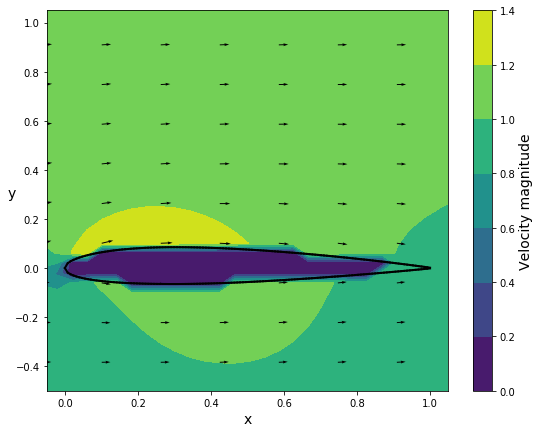

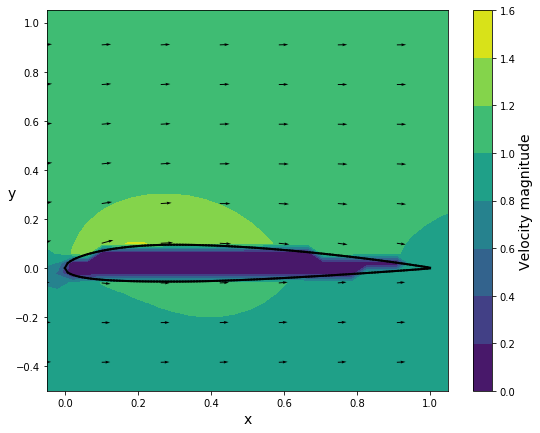

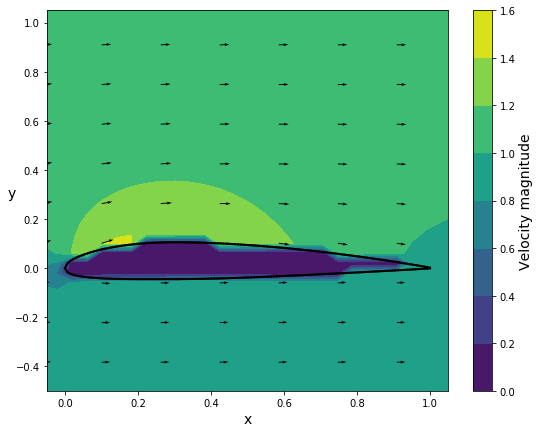

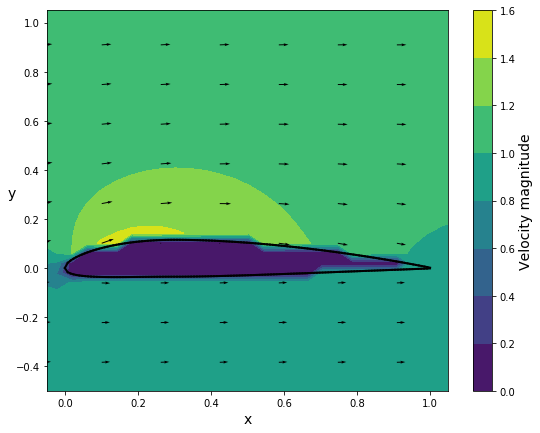

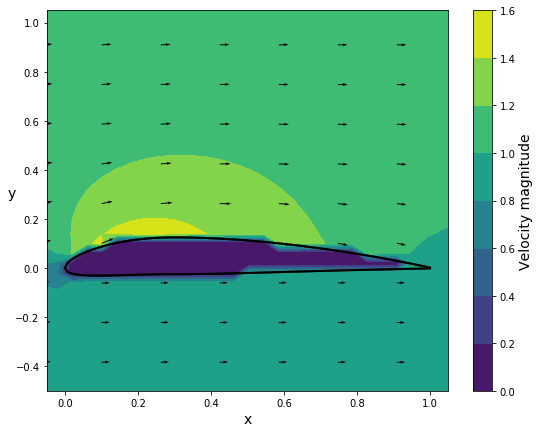

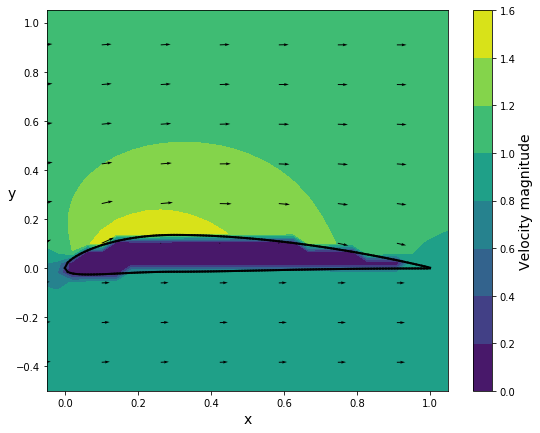

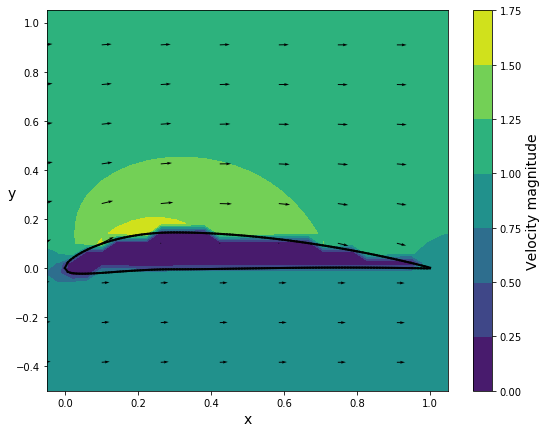

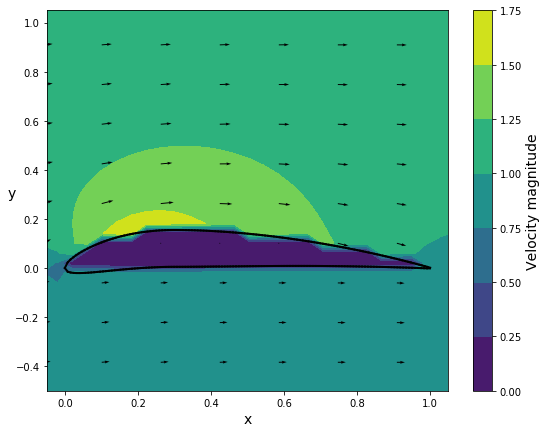

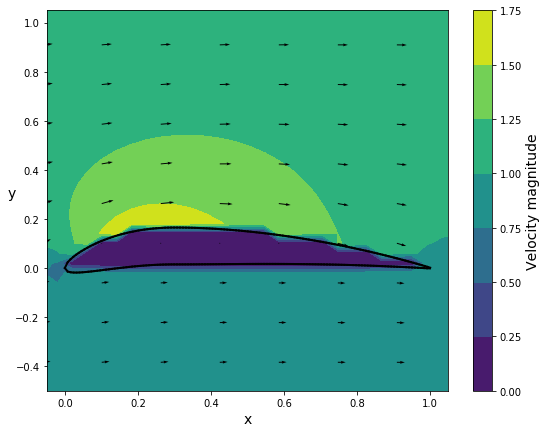

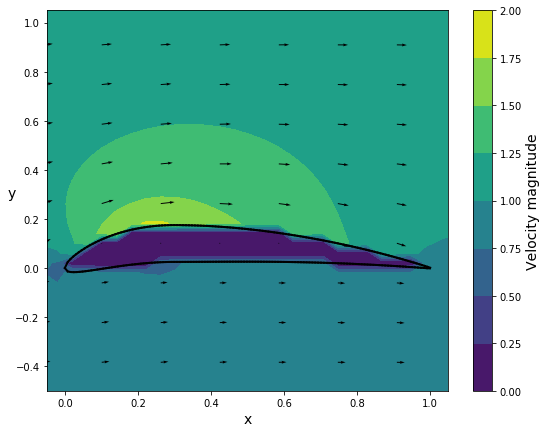

In [154]:
#vary camber

N = 64
alpha = 0.05

for i in range(10):
    m = 0.01 + (i/100)
    plot_naca4(N, m, alpha) 
    cam = round (m, 3)
    print(cam)
    

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


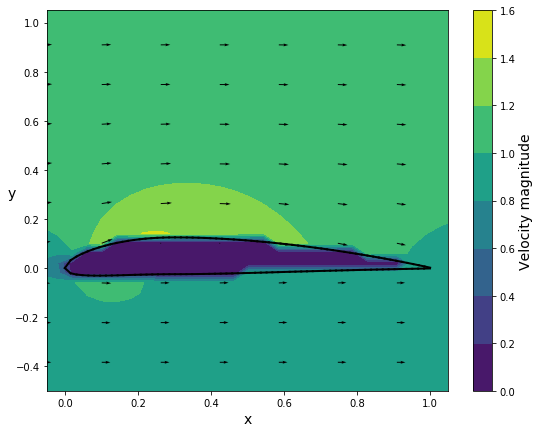

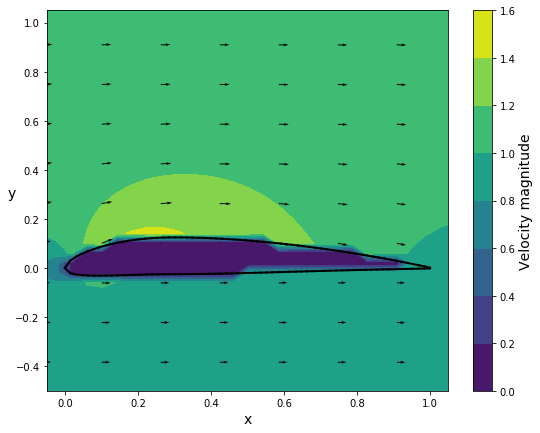

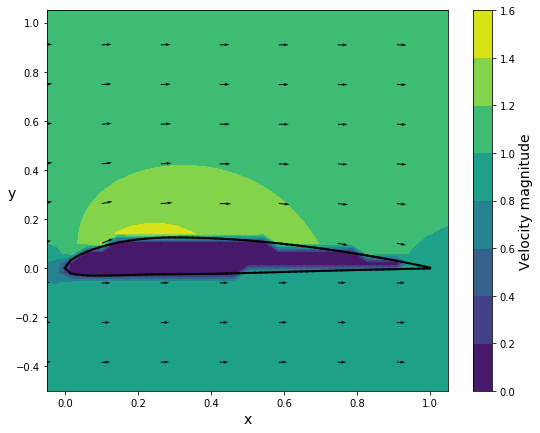

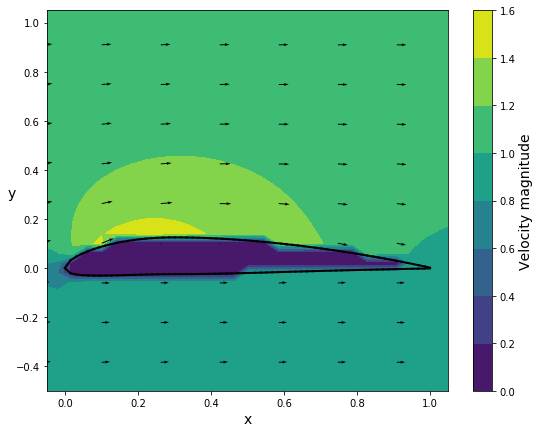

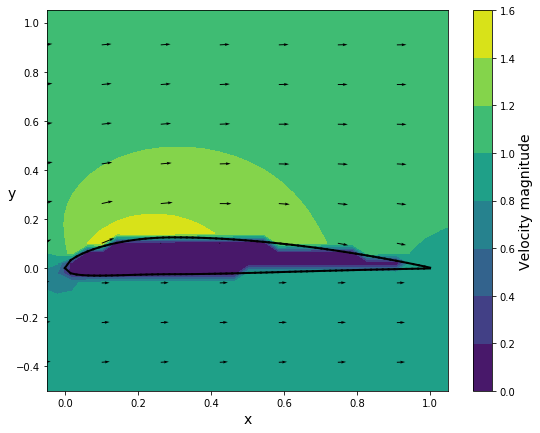

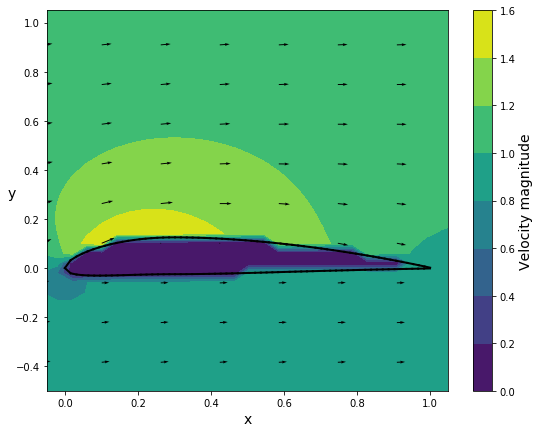

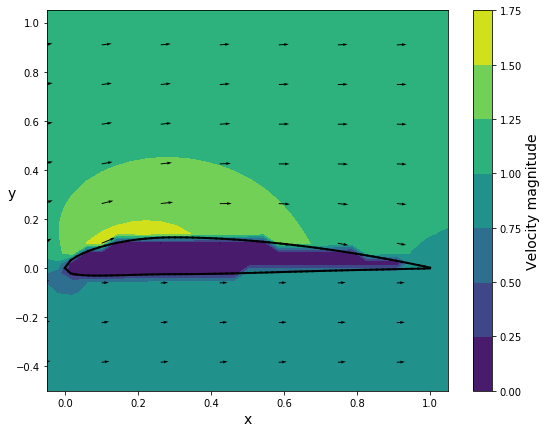

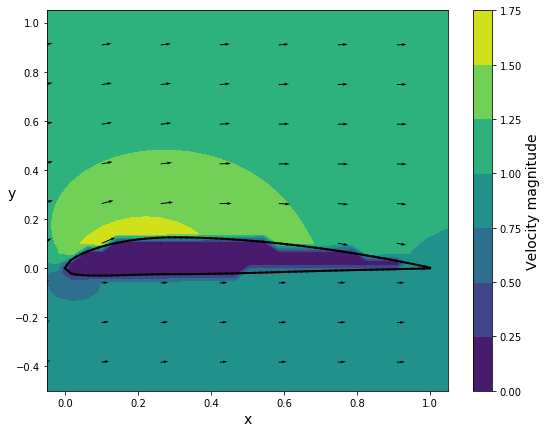

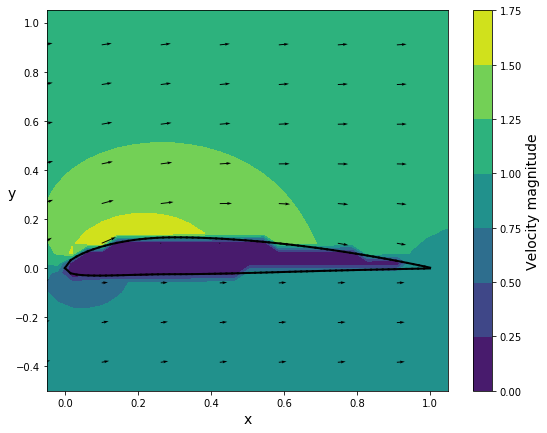

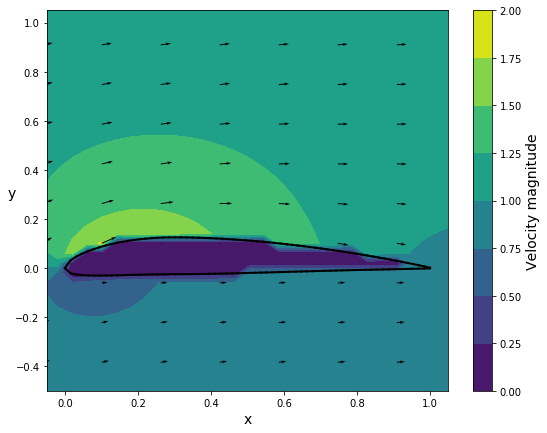

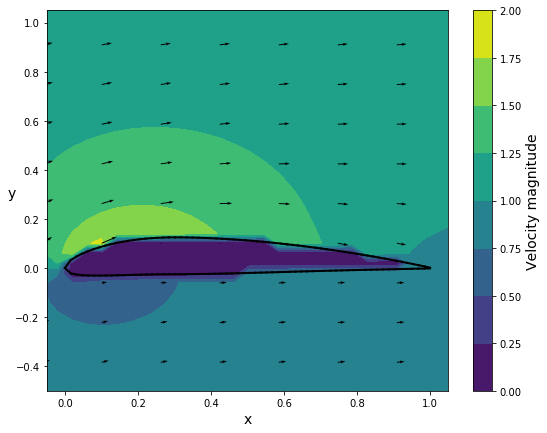

In [157]:
#vary alpha
N = 64
m = 0.05

for i in range(11):
    rad_alpha = (np.pi*i/180)
    plot_naca4(N, m, rad_alpha) 
    degree_alpha = 180*rad_alpha/np.pi
    print(degree_alpha)

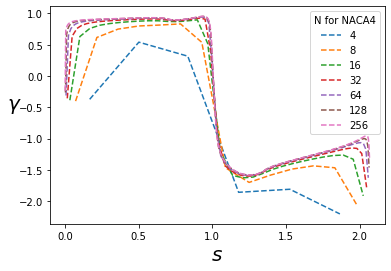

In [158]:
#validating Convergence of the system

# Loop over resolutions
for N in 2**np.arange(2,9,1):         # N in powers of 2
    naca = make_naca4(N, m=0.05)         # define geometry abitary value of m used
    s = naca.distance()              # get distance array
    
    naca.solve_gamma(alpha = 0.05, kutta = [(0, 1)])    # solve for gamma, abitary value of alpha used
    gamma = naca.get_array('gamma')   # get gamma array
    plt.plot(s,gamma,'--',label=N)      # plot

# plot to determine convergence
plt.legend(title='N for NACA4')
plt.xlabel(r'$s$', fontsize=20)
plt.ylabel(r'$\gamma$', fontsize=20, rotation=0)
plt.show()

#convergence around 64/128